# 教師あり学習：回帰

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# 教師データ作成

np.random.seed(seed=1) # 乱数を固定

X_min = 4 # Xの加減
X_max = 30 # Xの上限
X_n = 16 # データの個数

X = 5 + 25 * np.random.rand(X_n) # 年齢Xの生成
Prm_c = [170, 108, 0.2] # 生成パラメータ

# 身長の式
# 170 - 108 * exp(-0.2X) + 4 * 標準正規分布に従う16個の数(np.randn)
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n)

# 複数のndarrayをnpzで保存
np.savez('ch5_data.npz', X = X, X_min = X_min, X_max = X_max, X_n = X_n, T = T)

In [28]:
X

array([15.42555012, 23.00811234,  5.00285937, 12.55831432,  8.66889727,
        7.30846487,  9.65650528, 13.63901818, 14.91918686, 18.47041835,
       15.47986286, 22.13048751, 10.11130624, 26.95293591,  5.68468983,
       21.76168775])

In [29]:
T

array([170.91013145, 160.67559882, 129.00206616, 159.70139552,
       155.46058905, 140.56134369, 153.65466385, 159.42939554,
       164.70423898, 169.64527574, 160.71257522, 173.28709855,
       159.31193249, 171.51757345, 138.9570433 , 165.8744074 ])

In [30]:
# 小数点以下第二位で四捨五入
np.round(X, 2)

array([15.43, 23.01,  5.  , 12.56,  8.67,  7.31,  9.66, 13.64, 14.92,
       18.47, 15.48, 22.13, 10.11, 26.95,  5.68, 21.76])

In [31]:
np.round(T, 2)

array([170.91, 160.68, 129.  , 159.7 , 155.46, 140.56, 153.65, 159.43,
       164.7 , 169.65, 160.71, 173.29, 159.31, 171.52, 138.96, 165.87])

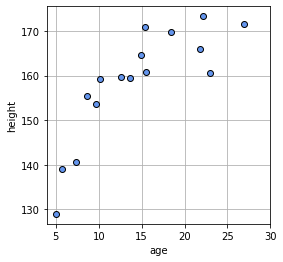

In [32]:
# グラフに表示
plt.figure(figsize=(4,4))
plt.plot(X, T, marker='o', linestyle='None', markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.xlabel('age')
plt.ylabel('height')
plt.show()

### 5.1.1 直線モデル

$y(x)=w_0x+w_1$

### 5.1.2 二乗誤差関数

$\displaystyle J = \frac{1}{N} \sum_{n=0}^{N-1} (y_n-t_n)^2$

- $J$は平均二乗誤差（mean squared error, MSE）という

In [33]:
from mpl_toolkits.mplot3d import Axes3D

In [34]:
# 誤差関数の定義
def mse_line(x,t,w):
    y = w[0]*x + w[1]
    mse = np.mean((y-t)**2)
    return mse

In [74]:
xn = 100 # 等高線表示の解像度
w0_range = [-25, 25]
w1_range = [120, 170]

# linspace(start,stop,num)で等差数列を作成
w0 = np.linspace(w0_range[0], w0_range[1], xn)
w1 = np.linspace(w1_range[0], w1_range[1], xn)

# 格子列を作成
ww0, ww1 = np.meshgrid(w0, w1)

In [75]:
# 参考
print('linspace','w0='+str(w0.shape),'w1='+str(w1.shape))
print('meshgrid','ww0='+str(ww0.shape),'ww1='+str(ww1.shape))

linspace w0=(100,) w1=(100,)
meshgrid ww0=(100, 100) ww1=(100, 100)


In [50]:
# 格子点に基づく平均二乗誤差の計算結果をJ[i1, i0]に入れる
J = np.zeros((len(w0), len(w1)))
for i0 in range(len(w0)):
    for i1 in range(len(w1)):
        J[i1, i0] = mse_line(X, T, (w0[i0], w1[i1]))

In [77]:
J.shape

(100, 100)

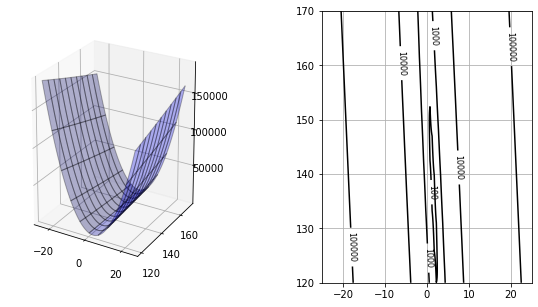

In [85]:
# 可視化

# グラフのサイズ
plt.figure(figsize=(9.4,5))

# グラフの余白、幅を調整する
# wspace : the amount of width reserved for space between subplots,
plt.subplots_adjust(wspace=0.5)

# subplot(行数、列数、数)
ax = plt.subplot(1,2,1,projection='3d')

# ３次元のグラフを作成する 
ax.plot_surface(ww0, ww1, J, rstride=10, cstride=10, alpha=0.3, color='blue', edgecolor='black')

# 目盛りの調整
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

# 等高線の表示
plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, J, 30, colors='black',levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%d', fontsize=8)
plt.grid(True)
plt.show()